## Youtube Streamers Analysis

Dataset: Top 1000 Youtubers Statistics

Description: This dataset contains valuable information about the top YouTube streamers, including their ranking, categories, subscribers, country, visits, likes, comments, and more.

My task here is to perform a comprehensive analysis of the dataset to extract insights about top YouTube content creators.

I'll start by loading the dataset

In [2]:
#load the dataset

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/PC/Downloads/youtubers_df.csv')

# Data Exploration

- Exploring the dataset to understand the sturcture and identify key variables
- Check for missing data and outliers


In [9]:
#Data Exploration and Cleaning
#Show the first rows of the dataset to understand the structure

print(df.head())


   Rank       Username           Categories   Suscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia                  NaN  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk

In [10]:
#Show the overview of the dataset including the datatypes and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB
None


In [11]:
#summary of statistics for numerical columns
print(df.describe())

              Rank    Suscribers        Visits         Likes       Comments
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean    500.500000  2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std     288.819436  1.682775e+07  5.229942e+06  2.580457e+05    6778.188308
min       1.000000  1.170000e+07  0.000000e+00  0.000000e+00       0.000000
25%     250.750000  1.380000e+07  3.197500e+04  4.717500e+02       2.000000
50%     500.500000  1.675000e+07  1.744500e+05  3.500000e+03      67.000000
75%     750.250000  2.370000e+07  8.654750e+05  2.865000e+04     472.000000
max    1000.000000  2.495000e+08  1.174000e+08  5.300000e+06  154000.000000


In [12]:
#check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64


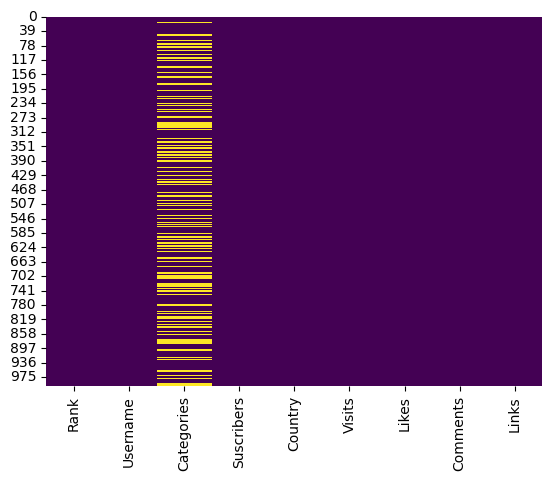

In [5]:
#Visualise missing values using heat map
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [7]:
#replace the missing values in the Categories column with the most frequently occuring Category

df['Categories'].fillna(df['Categories'].mode()[0], inplace=True)

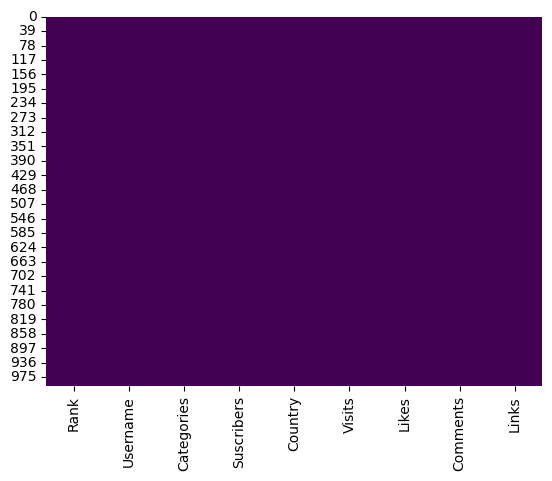

In [8]:
#check back for missing values by plotting a heatmap
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

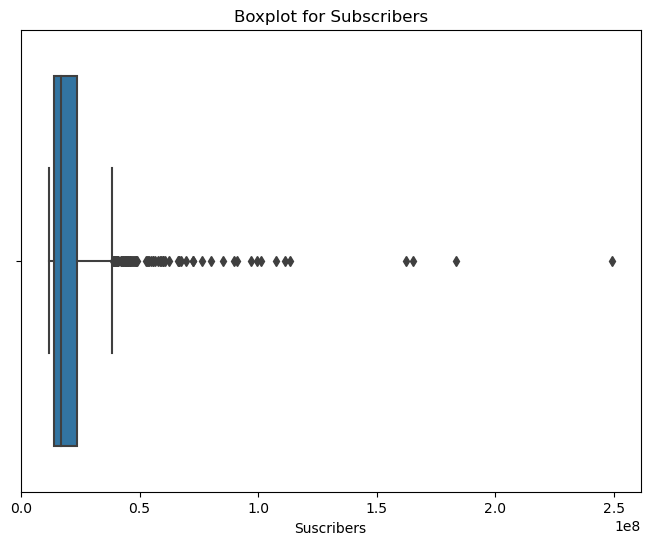

In [4]:
#identify outliers using boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Suscribers'])
plt.title('Boxplot for Subscribers')
plt.show()

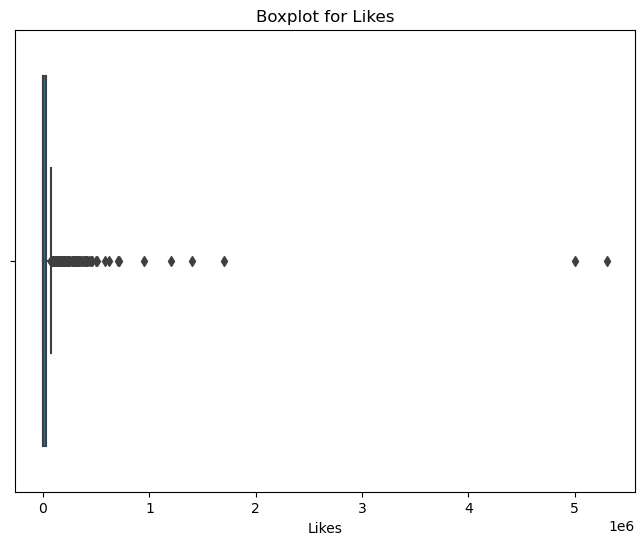

In [11]:
#identify if there are outliers in the 'Likes' column using boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Likes'])
plt.title('Boxplot for Likes')
plt.show()

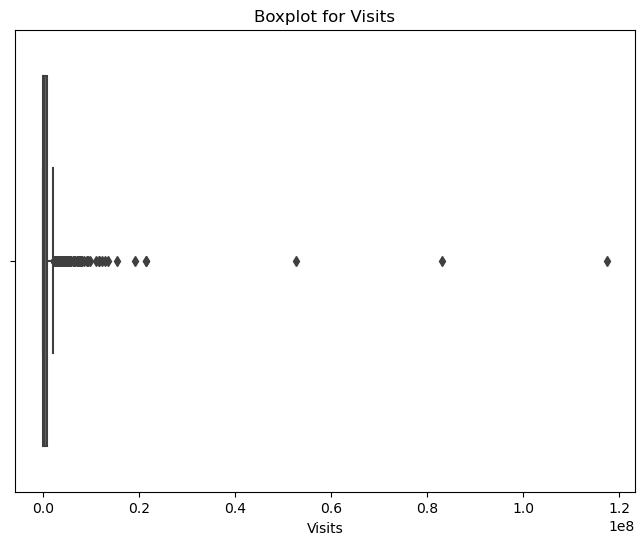

In [12]:
#identify outliers for the column, Visits by plotting a boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Visits'])
plt.title('Boxplot for Visits')
plt.show()

# Trend Analysis

- Identifying trends among the top YouTube streamers. Which categories are the most popular?
- Is there a correlation between the number of subscribers and the number of likes or comments?

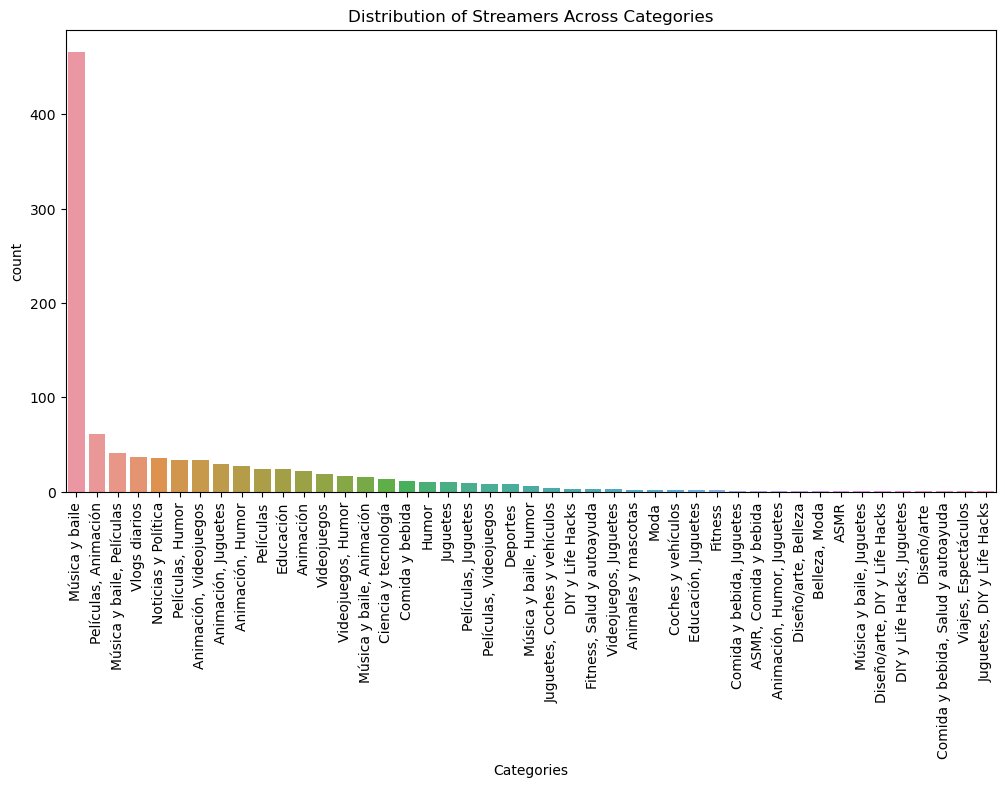

In [13]:
#define selected columns
selected_columns = ['Suscribers', 'Likes', 'Comments', 'Categories']

#create a subset of the dataframe with relevant columns
subset_df = df[selected_columns]

#identify popular categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Categories', data=subset_df, order=subset_df['Categories'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Streamers Across Categories')
plt.show()

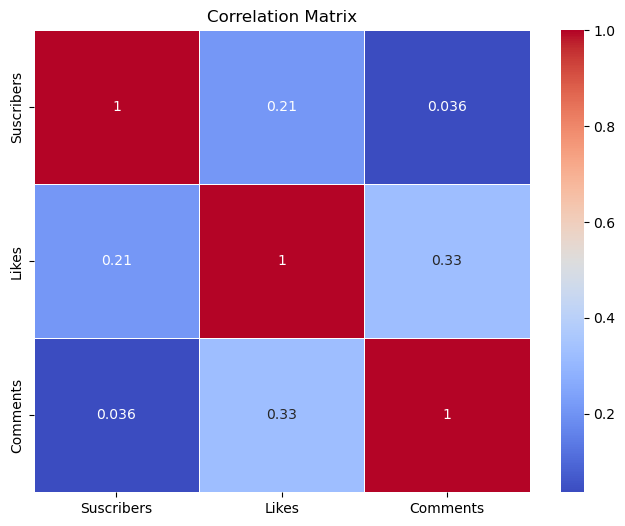

In [14]:
#correlation analysis to determine if there is a correlation between the number of subscribers and the number of likes or comments
correlation_matrix= subset_df[['Suscribers', 'Likes', 'Comments']].corr()

#To visualize the correlation coefficient
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


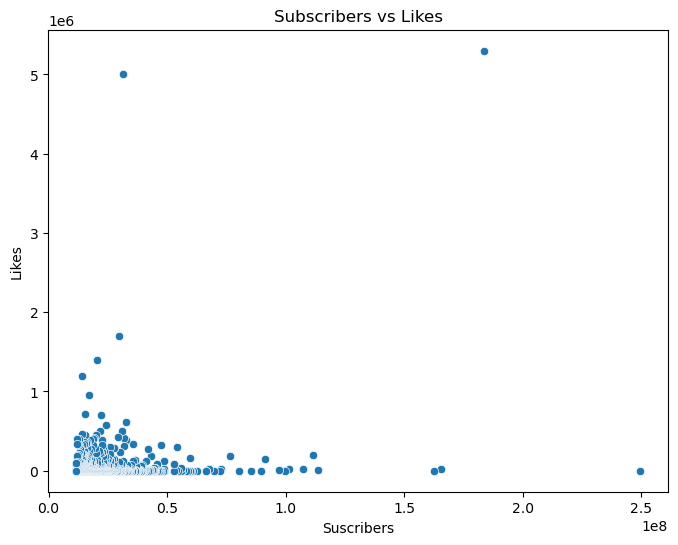

In [15]:
#scatterplot of subscribers vs likes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Suscribers', y='Likes', data=subset_df)
plt.title('Subscribers vs Likes')
plt.show()

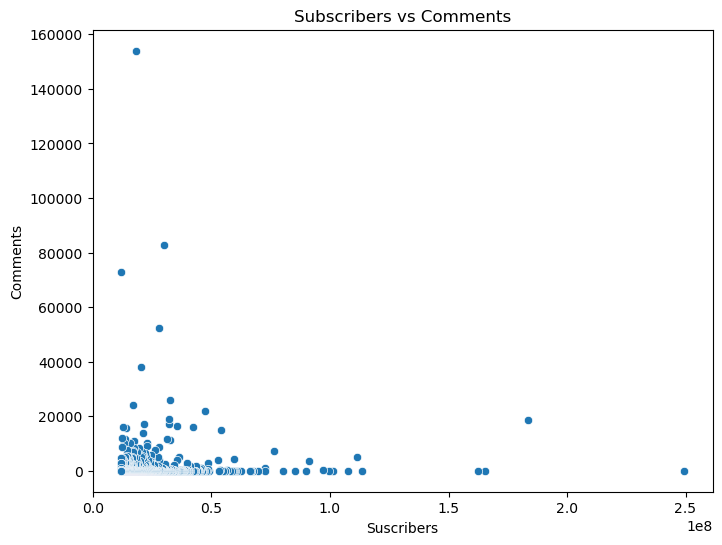

In [16]:
#scatterplot of subscribers vs likes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Suscribers', y='Comments', data=subset_df)
plt.title('Subscribers vs Comments')
plt.show()

# Audience Study:

- Analyze the distribution of streamers' audiences by country. Are there regional preferences for specific content categories?

I'll start by checking for unique values in the "Categories" and "Country" columns to understand the distribution of streamers and content categories.

In [3]:
#Unique values in the "Country" column

unique_countries = df["Country"].unique()
print("Unique Countries:", unique_countries)

#unique values in the "Categories" column

unique_categories = df['Categories'].unique()
print("Unique Categories:", unique_categories)

Unique Countries: ['India' 'Estados Unidos' 'Unknown' 'Brasil' 'México' 'Rusia' 'Pakistán'
 'Filipinas' 'Indonesia' 'Tailandia' 'Francia' 'Colombia' 'Iraq' 'Japón'
 'Ecuador' 'Argentina' 'Turquía' 'Arabia Saudita' 'El Salvador'
 'Bangladesh' 'Reino Unido' 'Argelia' 'España' 'Perú' 'Egipto' 'Jordania'
 'Marruecos' 'Singapur' 'Somalia']
Unique Categories: ['Música y baile' 'Videojuegos, Humor' 'Educación' nan
 'Animación, Juguetes' 'Películas, Videojuegos' 'Juguetes' 'Videojuegos'
 'Películas, Animación' 'Películas' 'Noticias y Política'
 'Animación, Humor' 'Música y baile, Animación'
 'Música y baile, Películas' 'Películas, Juguetes' 'Películas, Humor'
 'Vlogs diarios' 'Videojuegos, Juguetes' 'Animación, Videojuegos'
 'Animación' 'Música y baile, Humor' 'Diseño/arte, DIY y Life Hacks'
 'Ciencia y tecnología' 'Fitness, Salud y autoayuda' 'Belleza, Moda'
 'Humor' 'Comida y bebida' 'Deportes' 'Fitness' 'Viajes, Espectáculos'
 'Comida y bebida, Salud y autoayuda' 'Diseño/arte'
 'DIY y Life 

In [4]:
#to check the number of countries entered as "Unknown"

unknown_count = df["Country"].value_counts().get('Unknown', 0)

#print result

print(f"Number of entries named 'Unknown':{unknown_count}")

Number of entries named 'Unknown':171


In [5]:
#replace 'Unknown' with a more descriptive category

df['Country'].replace('Unknown', 'Not Specified', inplace=True)

# Visualising Distribution by country

Using a count plot to visialize distribution of streamers by country

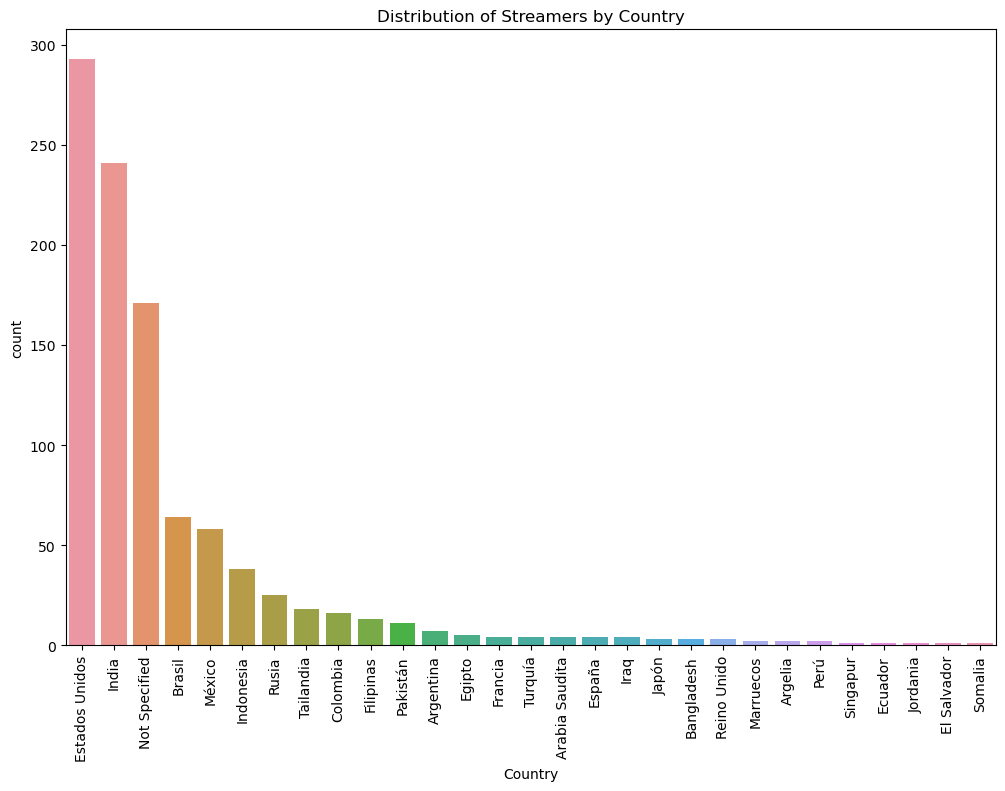

In [8]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Streamers by Country')
plt.show()

# Exploring Regional Preferences for Categories

- Investigating whether there are regional preferences for particular content categories.
- Using a count plot to investigate distribution of content categories across categories

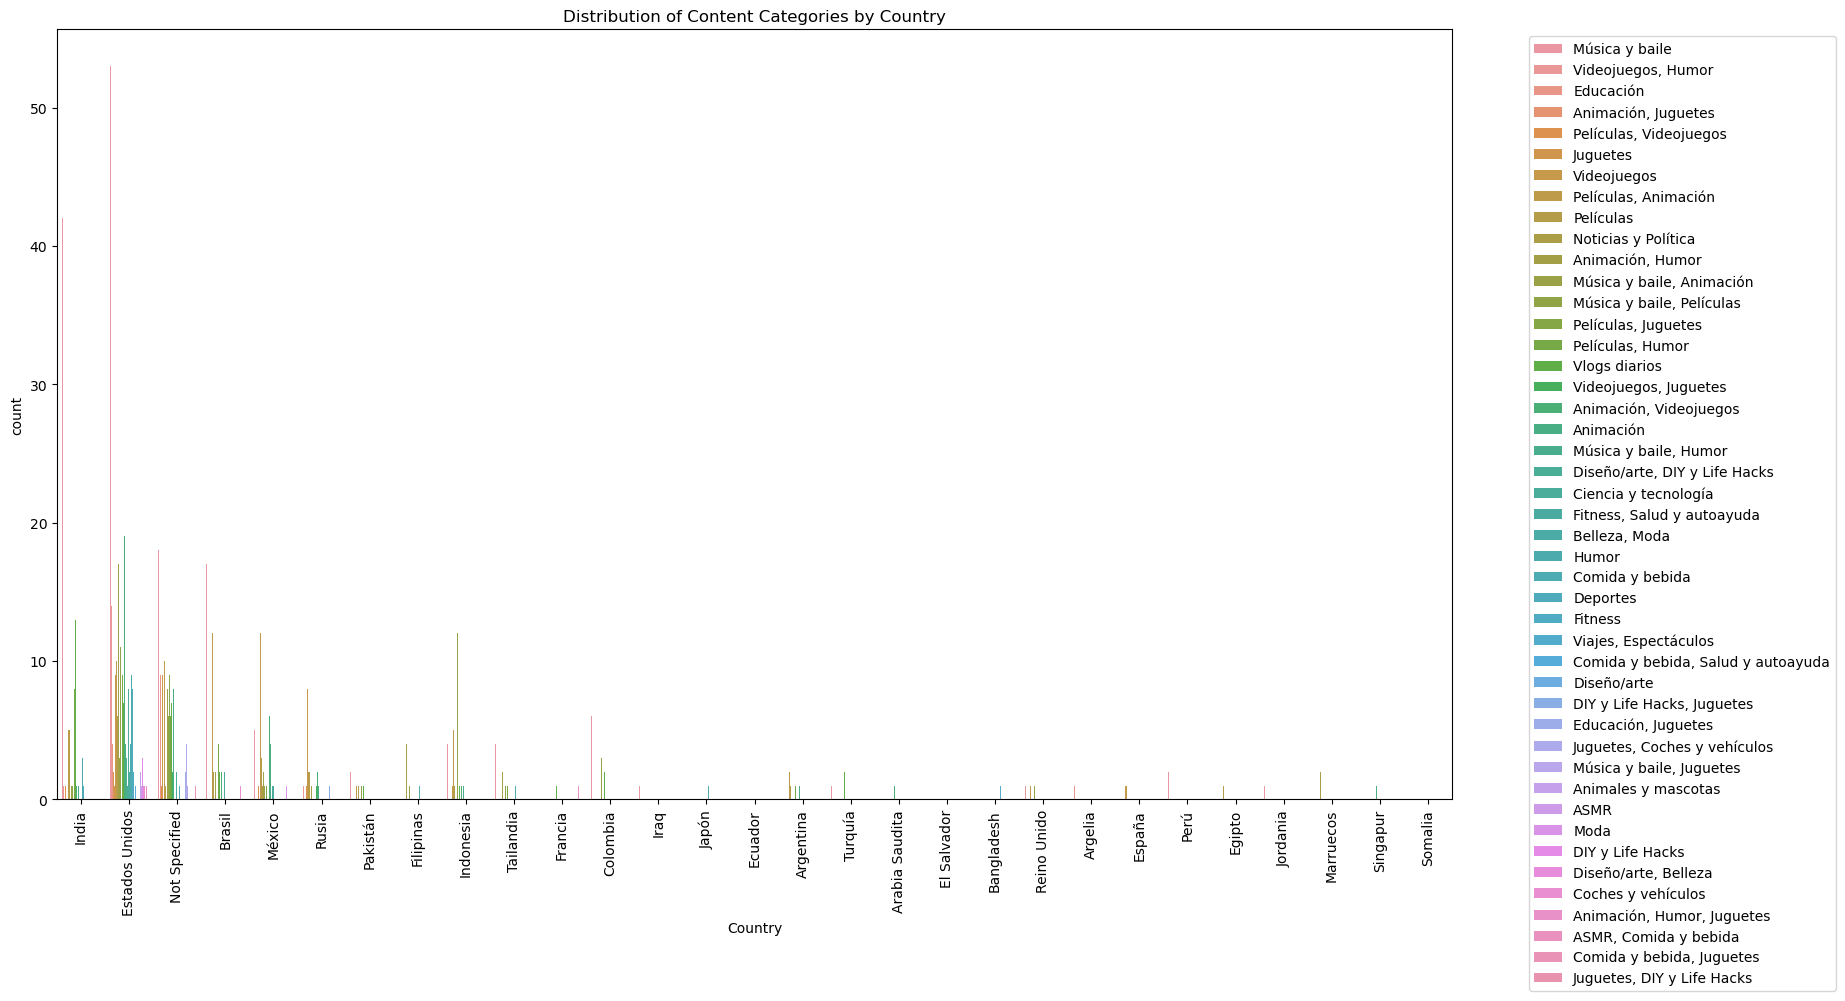

In [11]:
plt.figure(figsize=(18,10))
sns.countplot(x='Country', hue='Categories', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Content Categories by Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Statistical Analysis

- Performing a statistical analysis (chi-square test) to assess whether the distribution of content categories is different accross different countries

Null Hypothesis: There is no association between the country and content category.   

Alternate Hypothesis: There is an association between the country and content category.

In [16]:
from scipy.stats import chi2_contingency

#creating a contingency table

contingency_table = pd.crosstab(df['Country'], df['Categories'])

#perform chi-square test

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square Value: {chi2}, p-value: {p}")

Chi-square Value: 1797.776370988794, p-value: 6.094478820294259e-32


Since the p-value is extremely low, we would reject the null hypothesis. It implies that there is strong evidence to suggest that there is an association between the country of streamers and their content categories

# Heatmap for Cross-Country Categories

- Visualizing the frequency of each content category  across different countries using heatmap

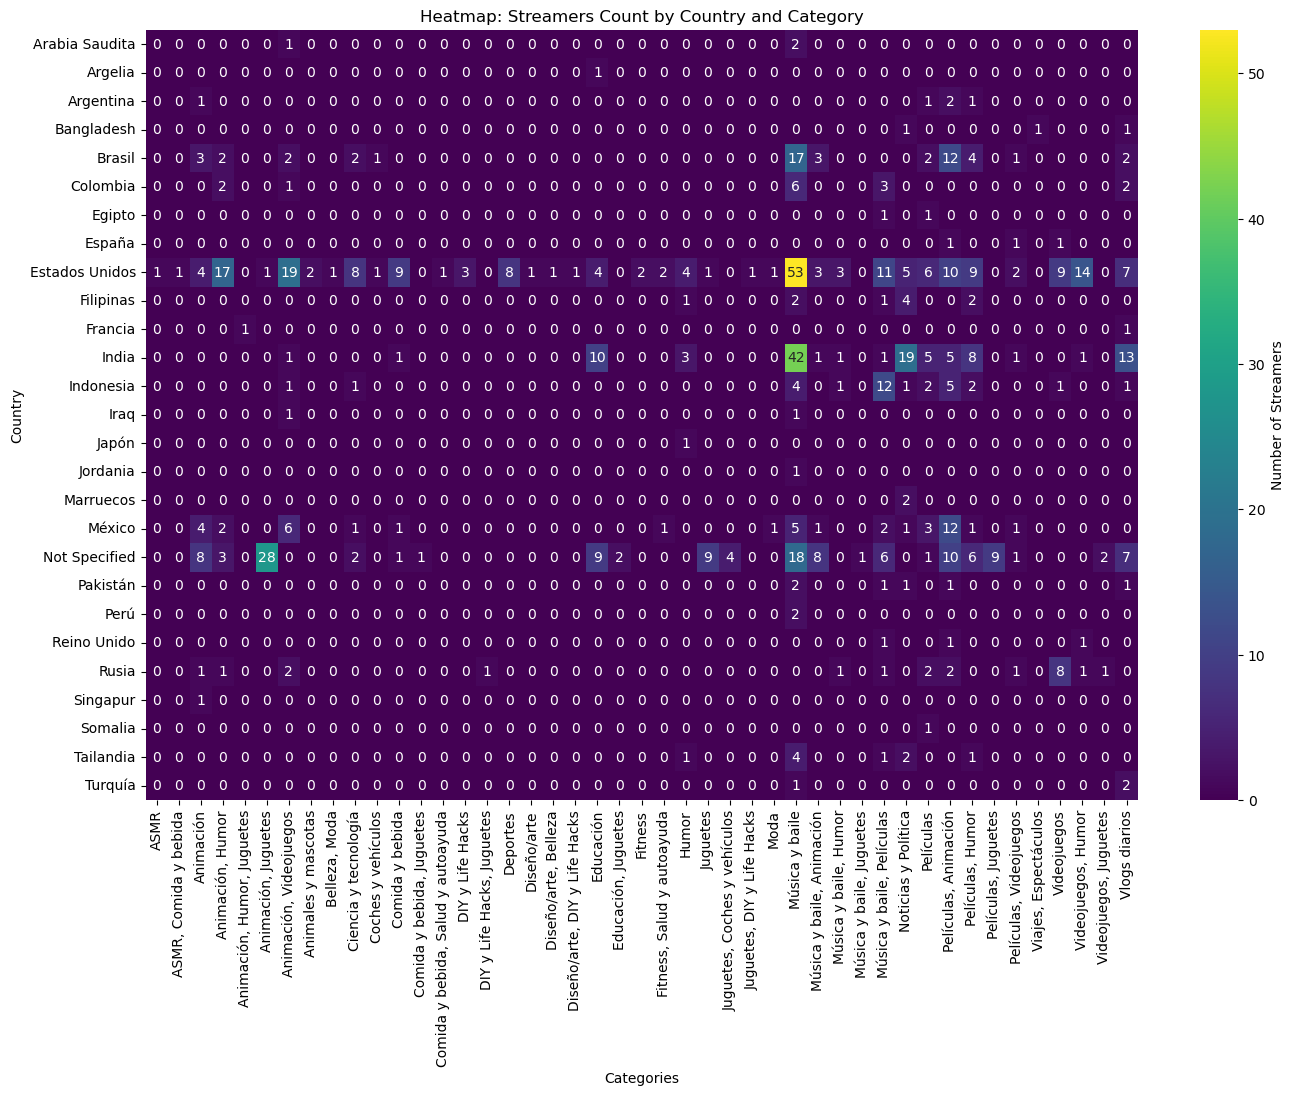

In [18]:
plt.figure(figsize=(16, 10))
heatmap_data = df.groupby(['Country', 'Categories']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Streamers'})
plt.title('Heatmap: Streamers Count by Country and Category')
plt.show()

## Performance Metrics

- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?

In [20]:
#Calculating the average of these metrics

average_subscribers = df['Suscribers'].mean()
average_visits = df['Visits'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

#Display the results

print(f"Average Number of Subscribers: {average_subscribers}")
print(f"Average Number of Visits: {average_visits}")
print(f"Avereage Number of Likes: {average_likes}")
print(f"Average Number of Comments: {average_comments}")

Average Number of Subscribers: 21894400.0
Average Number of Visits: 1209446.3155
Avereage Number of Likes: 53632.592
Average Number of Comments: 1288.768


# Visualizing the Averages for the Metrics

- Creating a bar plot to visialize the averages of the metrics

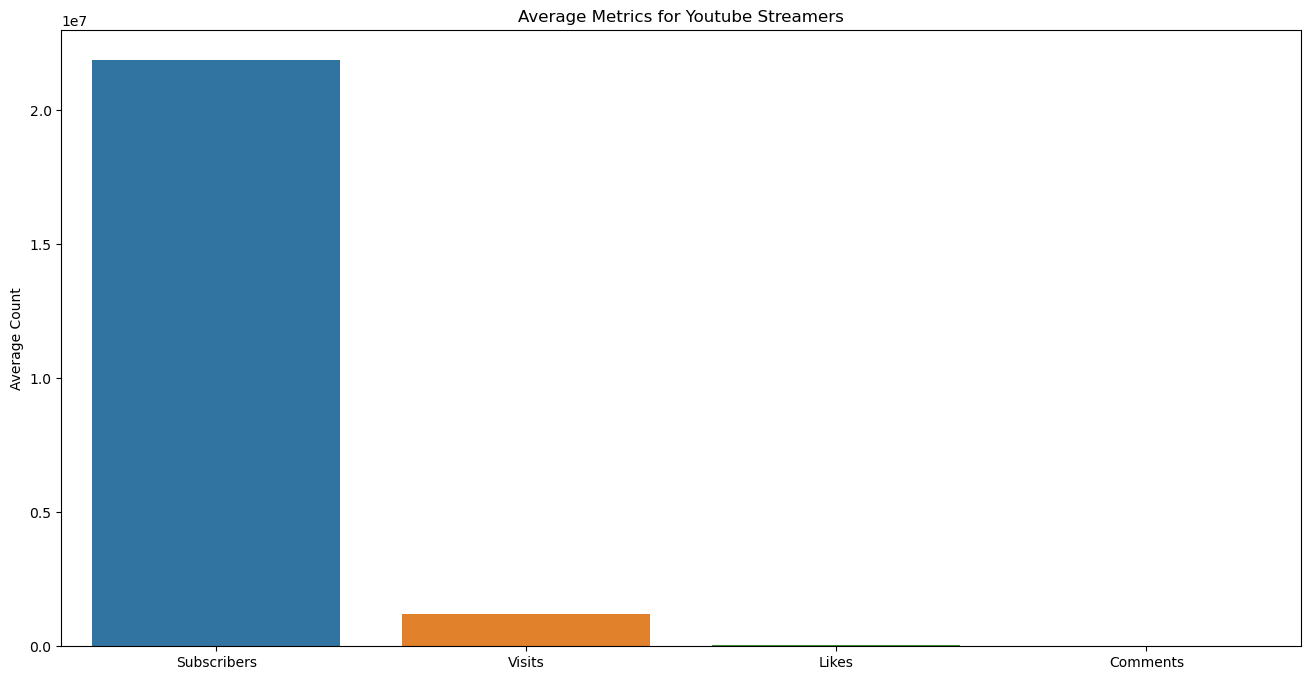

In [24]:
metrics = ['Subscribers', 'Visits', 'Likes', 'Comments']
averages = [average_subscribers, average_visits, average_likes, average_comments]

plt.figure(figsize=(16, 8))
sns.barplot(x=metrics, y=averages)
plt.title('Average Metrics for Youtube Streamers')
plt.ylabel('Average Count')
plt.show()

# Detecting Patterns or Anomalies

- Visualizing the distrubution of each metric individually using histogram to identify patterns or anomalies

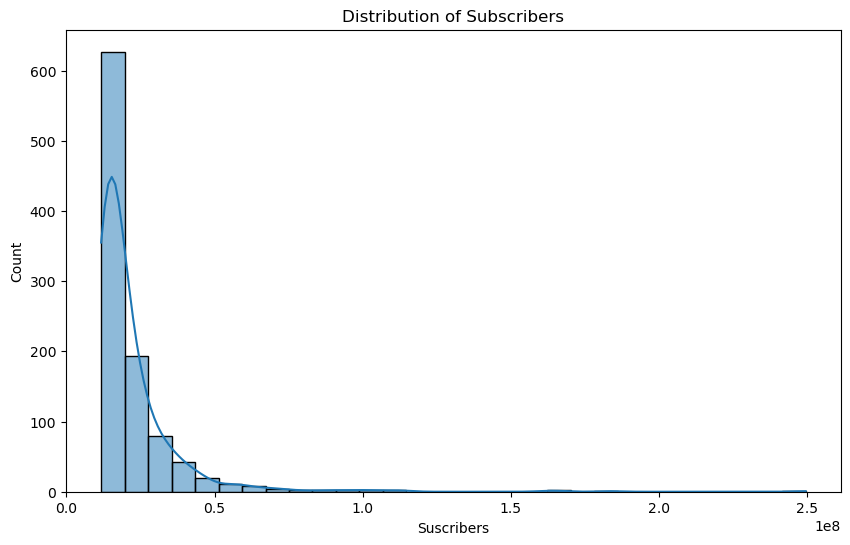

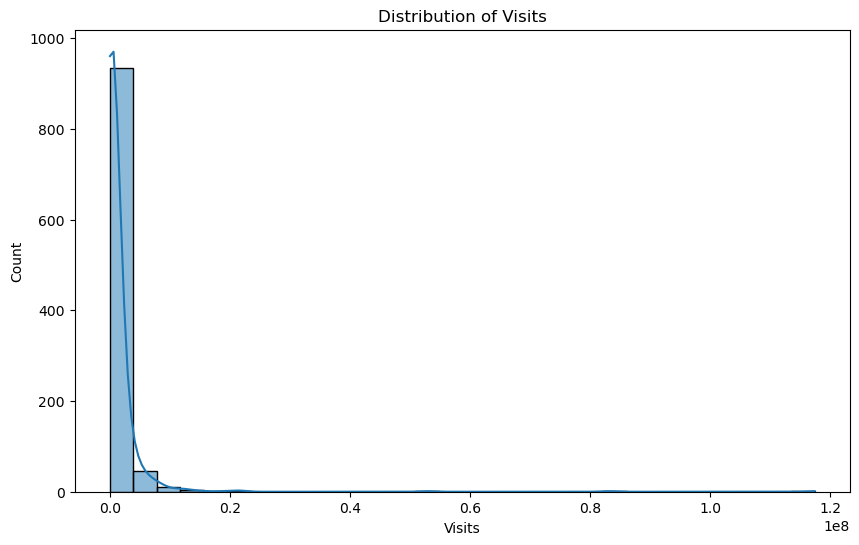

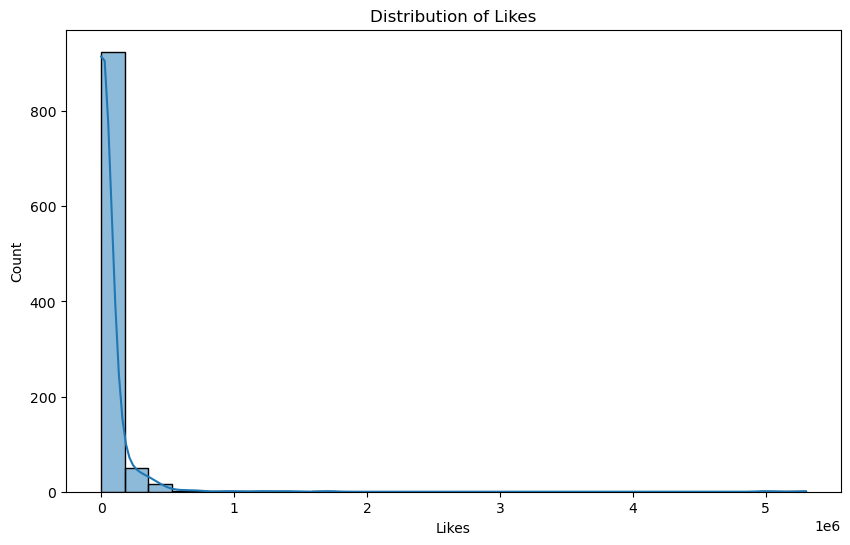

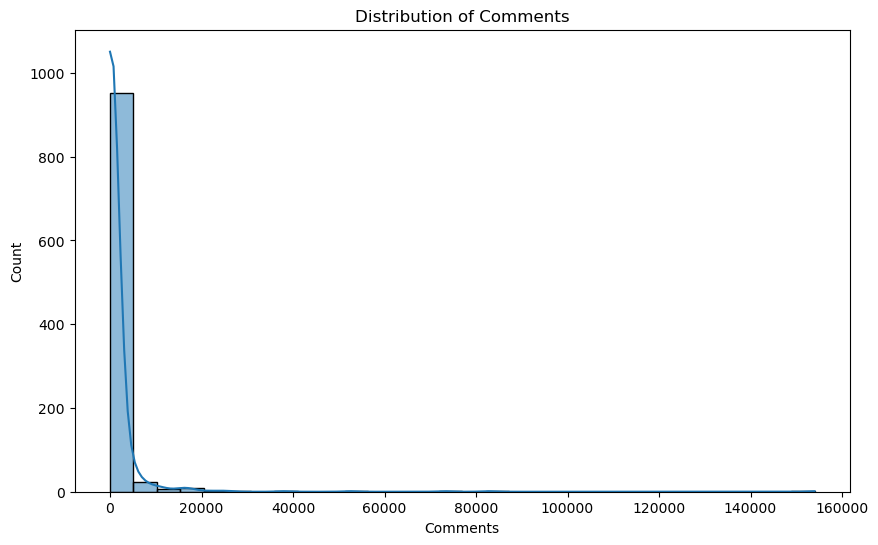

In [26]:
#Histogram for the Subscribers Column

plt.figure(figsize=(10, 6))
sns.histplot(df['Suscribers'], bins=30, kde=True)
plt.title('Distribution of Subscribers')
plt.show()

#Histogram for the Visits Column

plt.figure(figsize=(10, 6))
sns.histplot(df['Visits'], bins=30, kde=True)
plt.title('Distribution of Visits')
plt.show()

#Histogram for the Likes Column

plt.figure(figsize=(10, 6))
sns.histplot(df['Likes'], bins=30, kde=True)
plt.title('Distribution of Likes')
plt.show()

#Histogram for the Comments Column

plt.figure(figsize=(10, 6))
sns.histplot(df['Comments'], bins=30, kde=True)
plt.title('Distribution of Comments')
plt.show()

# Content Categories:

- Explore the distribution of content categories. Which categories have the highest number of streamers?
- Are there specific categories with exceptional performance metrics?

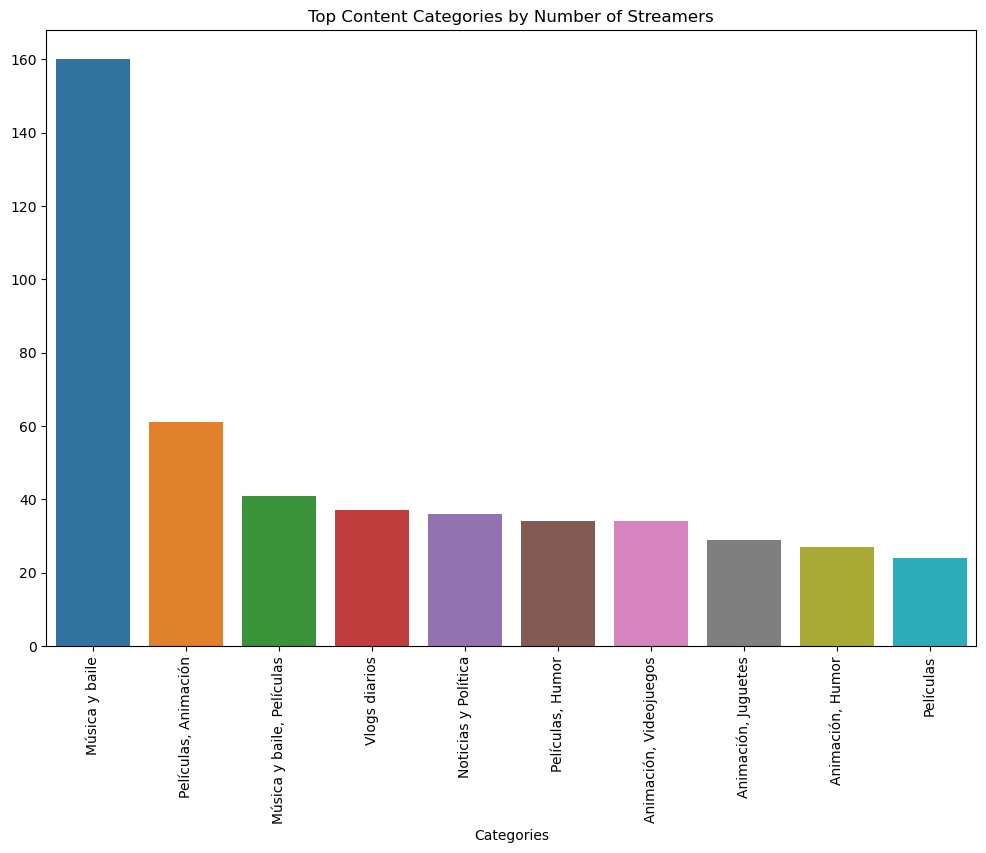

In [27]:
#checking the value counts for the categories with the highest number of streamers using barplot

top_categories = df['Categories'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=90)
plt.title('Top Content Categories by Number of Streamers')
plt.show()

# Brands and Collaborations:

- Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns.

In [31]:
#Defining high-performance based on the top quartile of subscribers

subscriber_threshold = df['Suscribers'].quantile(0.75)
df['HighPerformance'] = df['Suscribers'] >= subscriber_threshold


# Visualizing the Relationship:

Using visualizations to compare the distribution of high-performance streamers and non-high-performance streamers with regard to brand collaborations and marketing campaigns.

ValueError: Could not interpret input 'BrandCollaboration'

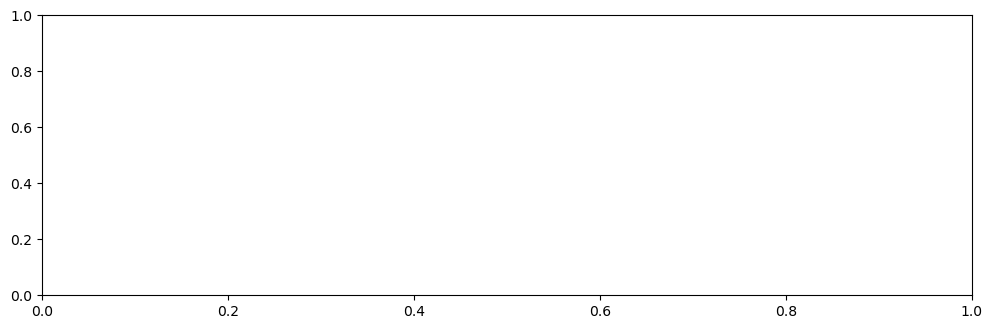

In [32]:
plt.figure(figsize=(12, 8))

# Count plot for Brand Collaborations
plt.subplot(2, 1, 1)
sns.countplot(x='HighPerformance', hue='BrandCollaboration', data=df)
plt.title('Distribution of Brand Collaborations by Performance Metrics')

# Count plot for Marketing Campaigns
plt.subplot(2, 1, 2)
sns.countplot(x='HighPerformance', hue='MarketingCampaign', data=df)
plt.title('Distribution of Marketing Campaigns by Performance Metrics')

plt.tight_layout()
plt.show()


# Benchmarking:

- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?

In [36]:
above_average_criteria = 1.2  # Defining an above average criteris

above_average_subscribers = above_average_criteria * average_subscribers
above_average_visits = above_average_criteria * average_visits
above_average_likes = above_average_criteria * average_likes
above_average_comments = above_average_criteria * average_comments

#identifying top performing content creators
top_streamers = df[
    (df['Suscribers'] > above_average_subscribers) &
    (df['Visits'] > above_average_visits) &
    (df['Likes'] > above_average_likes) &
    (df['Comments'] > above_average_comments)
]

#Displaying top performers
print("Top Performing Content Creators:")
print(top_streamers[['Username', 'Categories', 'Suscribers', 'Visits', 'Likes', 'Comments']])



Top Performing Content Creators:
                 Username              Categories   Suscribers       Visits  \
1                 MrBeast      Videojuegos, Humor  183500000.0  117400000.0   
5               PewDiePie  Películas, Videojuegos  111500000.0    2400000.0   
26            dudeperfect             Videojuegos   59700000.0    5300000.0   
34            TaylorSwift          Música y baile   54100000.0    4300000.0   
39            JuegaGerman    Películas, Animación   48600000.0    2000000.0   
43               A4a4a4a4        Animación, Humor   47300000.0    9700000.0   
58              Mikecrack    Películas, Animación   43400000.0    2200000.0   
62         KimberlyLoaiza          Música y baile   42100000.0    5300000.0   
64        luisitocomunica                     NaN   41100000.0    2500000.0   
96         TotalGaming093  Películas, Videojuegos   36300000.0    1500000.0   
98   TechnoGamerzOfficial                     NaN   35600000.0    6200000.0   
100            mark

# Content Recommendations:

- Propose a system for enhancing content recommendations to YouTube users based on streamers' categories and performance metrics

Enhancing content recommendations on YouTube based on streamers' categories and performance metrics involves leveraging a recommendation system that takes into account user preferences, content categories, and the performance of streamers. Here's a high-level proposal for such a system:

1. **User Profiling:**
   - Develop user profiles based on their viewing history, liked videos, and interactions.
   - Include user preferences for specific content categories, streamer performance metrics (e.g., preferred subscriber count, likes, comments), and historical engagement patterns.

2. **Content Categorization:**
   - Improve and expand the categorization of content on YouTube to include more granular categories or sub-genres.
   - Utilize machine learning techniques for automatic content tagging based on video features, titles, and descriptions.

3. **Streamer Performance Metrics:**
   - Incorporate streamer performance metrics (e.g., subscribers, likes, comments) as additional features in the recommendation system.
   - Consider normalizing performance metrics to account for varying audience sizes.

4. **Collaborative Filtering:**
   - Implement collaborative filtering techniques to recommend content based on the preferences and behaviors of users with similar profiles.
   - Explore both user-based and item-based collaborative filtering approaches.

5. **Content-Based Filtering:**
   - Utilize content-based filtering to recommend videos similar to those the user has already enjoyed, considering content categories and streamer performance metrics.
   - Leverage natural language processing (NLP) techniques to analyze video titles and descriptions.

6. **Hybrid Recommendation System:**
   - Develop a hybrid recommendation system that combines collaborative filtering, content-based filtering, and possibly other recommendation techniques (e.g., matrix factorization, deep learning models).
   - Fine-tune the weighting of different recommendation components based on user feedback and system performance.

7. **Real-Time Updates:**
   - Implement a system that continuously updates user profiles and recommendations in real-time as user preferences evolve and new content becomes available.
   - Regularly update streamer performance metrics to ensure accurate recommendations.

8. **Feedback Loop:**
   - Integrate a feedback loop where users can provide explicit feedback on recommended content.
   - Use implicit feedback signals, such as watch time and engagement, to further refine recommendations.

9. **Diversity in Recommendations:**
   - Ensure diversity in recommendations to expose users to a variety of content categories and streamers.
   - Implement techniques to balance popular content with personalized recommendations.

10. **Privacy Considerations:**
    - Implement privacy-aware features to respect user data and comply with privacy regulations.
    - Provide transparent options for users to control and customize their recommendation settings.

11. **A/B Testing:**
    - Conduct A/B testing to evaluate the performance of the recommendation system.
    - Monitor key metrics such as user engagement, click-through rates, and user satisfaction.

Implementing such a system requires collaboration between data scientists, machine learning engineers, and domain experts to fine-tune the algorithms and ensure effective recommendations. Regularly analyze user feedback and system performance to iteratively improve the recommendation system over time.